Causal inference in multivariate time series

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scms import structural_causal_models

np.random.seed(1)

In [5]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
     
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [6]:
# Load data from a .npz file
# file_path = r'datasets/netsim/sim3_subject_7.npz'
# loaded_data = np.load(file_path)

# n = loaded_data['n.npy']
# T = loaded_data['T.npy']
# Gref = loaded_data['Gref.npy']
# # Access individual arrays within the .npz file
# data = loaded_data['X_np.npy']
# data = data.transpose()

# df = pd.DataFrame(data[:, 5:15])

# df = pre.load_flux_data()
# # df = df.apply(normalize)

# nodes = len(df.columns)
# params = {'g_one_start': 0,
#                   'g_one_end': int(nodes/2),
#                   'g_two_start': int(nodes/2),
#                   'g_two_end': nodes
#                  }

In [7]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 0.6, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 8, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = structural_causal_models(nodes, edge_density)
        df, links = dag.df_timeseries()



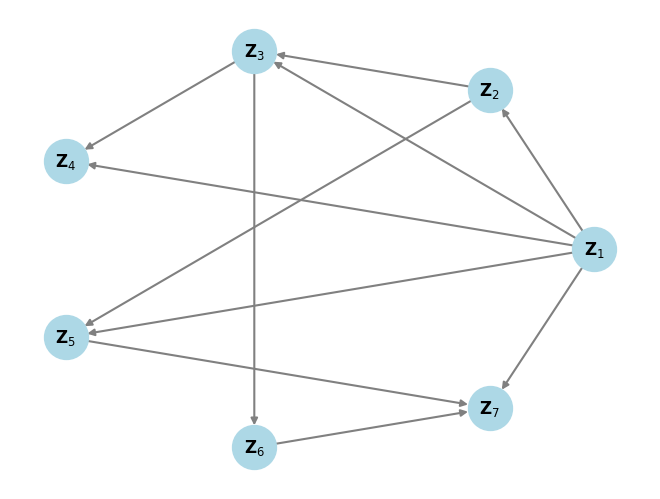

In [8]:
dag.draw_DAG()

In [28]:
# df.corr()